<a href="https://colab.research.google.com/github/Daun1la/Internship/blob/main/DD_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from scipy.stats import uniform, norm, chisquare
import math
from statistics import mean, median

uploaded = files.upload()

with open('Waveform1.txt', 'r') as f:
    content = f.read()

#перевод исходного списка в float список с удалением пустого элемента, и заменой первого на ноль
str_arr = content.split('\n')
impulse = np.array([0.0] + [float(item) for item in str_arr[1:] if item != ''])

#adc_step = 32767

Saving Waveform1.txt to Waveform1.txt


In [2]:
def generate_uniform_distribution(min_amplitude, max_amplitude, num_impulses, impulse):
    # Создание массива амплитуд с равномерным распределением
    amplitudes = uniform.rvs(loc=min_amplitude, scale=max_amplitude - min_amplitude, size=num_impulses)
    # Генерация подобных импульсов с заданными амплитудами
    similar_impulses = amplitudes[:, np.newaxis] * impulse / max(impulse)
    return similar_impulses

def generate_normal_distribution(mean_amplitude, std_dev_amplitude, num_impulses, impulse):
    # Создание массива амплитуд с нормальным распределением
    amplitudes = norm.rvs(loc=mean_amplitude, scale=std_dev_amplitude, size=num_impulses)
    # Генерация подобных импульсов с заданными амплитудами
    similar_impulses = amplitudes[:, np.newaxis] * impulse / max(impulse)
    return similar_impulses

def generate_impulses(amp_temp, counter):
    vol = []
    amend = 0.001 - 1e-10
    for x, y in zip(amp_temp, counter):
        voli = [np.random.uniform(x, x + amend) for _ in range(y)]
        vol += voli
    np.random.shuffle(vol)
    return np.array(vol)

def plot_combined_data(similar_impulses):
    num_impulses, num_samples = similar_impulses.shape
    time_axis = np.arange(num_samples * num_impulses) * 4
    combined_data = np.hstack(similar_impulses)
    # Визуализация объединенного массива
    fig = plt.figure(figsize=(20, 6))
    plt.plot(time_axis, combined_data)
    plt.title('Impulses')
    plt.xlabel('Time, ns')
    plt.ylabel('Amplitude, V')
    plt.show()

def plot_uniform_distribution(similar_impulses, min_amplitude, max_amplitude, bin_width = 0.05):
    # Гистограмма для равномерного распределения
    max_arr = [y.max() for y in similar_impulses]
    bins = np.arange(min_amplitude, max_amplitude, bin_width)
    hist, edges = np.histogram(max_arr, bins=bins)

    # Настройка графика
    fig = plt.figure(figsize=(10,5))
    plt.bar(bins[:-1], hist, width=bin_width*0.9, align='edge', edgecolor='black')
    plt.title('Distribution of amplitudes')
    plt.xlabel('Value, V')
    plt.ylabel('Frequency')

    # Вывод количества насчитанных амплитуд
    for i in range(len(hist)):
        plt.text(edges[i], hist[i], str(hist[i]), ha='left', va='bottom')

    plt.grid(True)
    plt.show()

def plot_normal_distribution(similar_impulses, mean_amplitude, std_dev_amplitude, bin_width = 0.05):
    # Гистограмма для нормального распределения
    max_arr = [y.max() for y in similar_impulses]
    bins = np.arange(mean_amplitude - 3 * std_dev_amplitude, mean_amplitude + 3 * std_dev_amplitude, bin_width)
    hist, edges = np.histogram(max_arr, bins=bins)

    # Настройка графика
    fig = plt.figure(figsize=(10,5))
    plt.bar(bins[:-1], hist, width=bin_width * 0.9, align='edge', edgecolor='black')
    plt.title('Distribution of amplitudes')
    plt.xlabel('Value, V')
    plt.ylabel('Frequency')

    for i in range(len(hist)):
        plt.text(edges[i], hist[i], str(hist[i]), ha='left', va='bottom')

    plt.grid(True)
    plt.show()

def plot_amplitude_histogram(similar_impulses, bin_width = 0.02):
    max_arr = [y.max() for y in similar_impulses]
    bins = np.arange(0.2, 0.701, bin_width)
    hist, edges = np.histogram(max_arr, bins=bins)
    fig = plt.figure(figsize=(8, 4))
    plt.bar(bins[:-1], hist, width=bin_width * 0.95, align='edge', edgecolor='black')
    plt.title('Распределение амплитуд')
    plt.xlabel('Амплитуда, В')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

def show_time_distribution(index, num_impulses, count_rate):
    times = []
    N_times = num_impulses
    sample_value = 4
# создаем массив из N элементов, по формуле выше
    for t in range(N_times):
        times.append(-math.log10(random.uniform(1e-20, 1))/(count_rate*sample_value)*1e+06*4) #мкс

# Время, генерируемое по этой формуле физическое - 1 нс эквивалентна 1 нс
# Но время, в котором описывается импульс имеет цену деления в 4нс
# Получается, что 4нс в массиве times должны быть переведены в 1 отсчет
# И уже в таком виде учитываться в сложении импульсов
# диапазон для подсчета
    bin_range = (0, 4*1e+06/count_rate)
    bins = 20

# Подсчет количества значений в диапазоне
    hist, bin_edges = np.histogram(times, bins, range=bin_range)

    fig = plt.figure(figsize=(15, 4))
    plt.hist(times, bins, range=bin_range)
    plt.grid(True)
# Вывод значений количества временных интервалов над каждым бином
    bin_start = bin_edges[0]
    bin_end = bin_edges[1]
    for i in range(len(hist)):
        bin_center = (bin_edges[i] + bin_edges[i+1]) / 2
        count = hist[i]
        plt.text(bin_center, count, str(count), ha='left', va='baseline')
    print("Width of bin: " + f'{(bin_end-bin_start):.1f}'+ ' μs')
    print("Mean value: " + f'{mean(times):.1f}' + " μs")
    plt.title('Time distribution')
    plt.xticks(np.arange(bin_start, bin_edges[20], step=(bin_end-bin_start)*2))
    plt.ylabel('Quantity')
    plt.xlabel('Time, μs')
    plt.show()

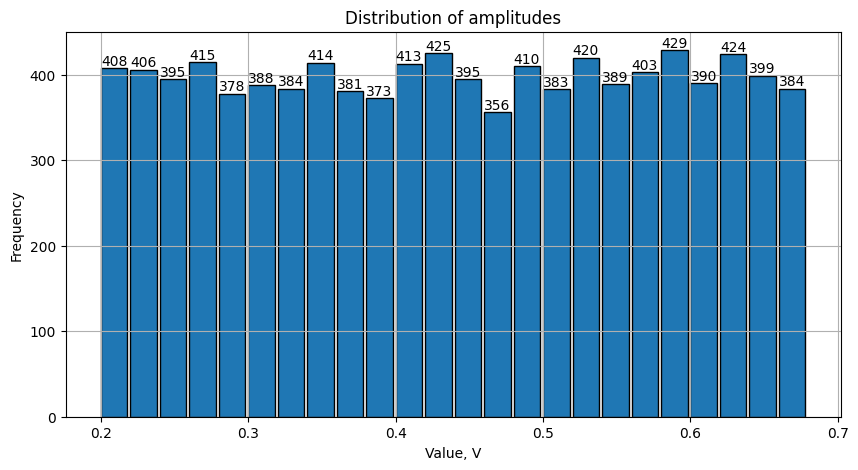

Width of bin: 0.2 μs
Mean value: 0.4 μs


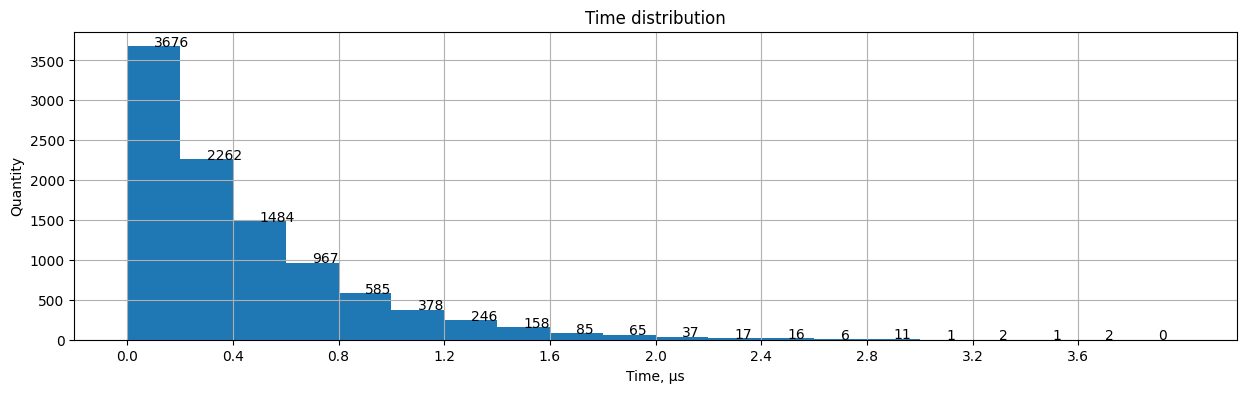

In [28]:
# Параметры распределения
num_impulses = 10000
bin_width = 0.02
# Index of CR
index = 6
count_rate = 10**index
# 0 - равномерное, 1 - нормлаьное, 2 - свое
types = 0

# Вывод равномерного распределения
min_amplitude = 0.2
max_amplitude = 0.7

# вывод нормального распределения
mean_amplitude = 0.5
std_dev_amplitude = 0.1

# Параметры для собственного рапределения
amp_temp = np.arange(0.2, 0.7, bin_width)
counter = np.array([700,600,550,530,530,550,600,550,450,450,550,350,300,350,450,550,350,220,0,10,400,550,400,10])

# Генерация и визуализация равномерного, нормального либо случайного распределения и Визуализация гистограммы распределения
if types == 0:
    similar_impulses = generate_uniform_distribution(min_amplitude, max_amplitude, num_impulses, impulse)
    plot_uniform_distribution(similar_impulses, min_amplitude, max_amplitude, bin_width)
elif types == 1:
    similar_impulses = generate_normal_distribution(mean_amplitude, std_dev_amplitude, num_impulses, impulse)
    plot_normal_distribution(similar_impulses, mean_amplitude, std_dev_amplitude, bin_width)
elif types == 2:
    similar_impulses = generate_impulses(amp_temp, counter)[:, np.newaxis] * impulse / max(impulse)
    plot_amplitude_histogram(similar_impulses, bin_width)
else:
    print("Types must be equal to 0, 1 or 2")

# График созданной последовательности импульсов без наложения
#plot_combined_data(similar_impulses)

# График временного распределения
show_time_distribution(index, num_impulses, count_rate)

In [ ]:
# создаем массив из N элементов, по формуле выше
times =[]
sample_value = 4
for t in range(num_impulses):
    times.append(-math.log10(random.uniform(1e-20, 1))/(count_rate*sample_value)*1e+09) #нс

initial = [0.0] * 1000000

step = 0
for impulse, duration in zip(similar_impulses, times):
    step += int(duration)
    initial = initial[:step] + [initial[i] + impulse[i - step] for i in range(step, len(impulse) + step)] + initial[len(impulse) + step:]

times_sum = np.arange(len(initial))*4  # Предполагая, что каждый отсчет равен 4 временным единицам
x_max = (sum(times)+(similar_impulses.shape[0]*similar_impulses.shape[1]))*0.8

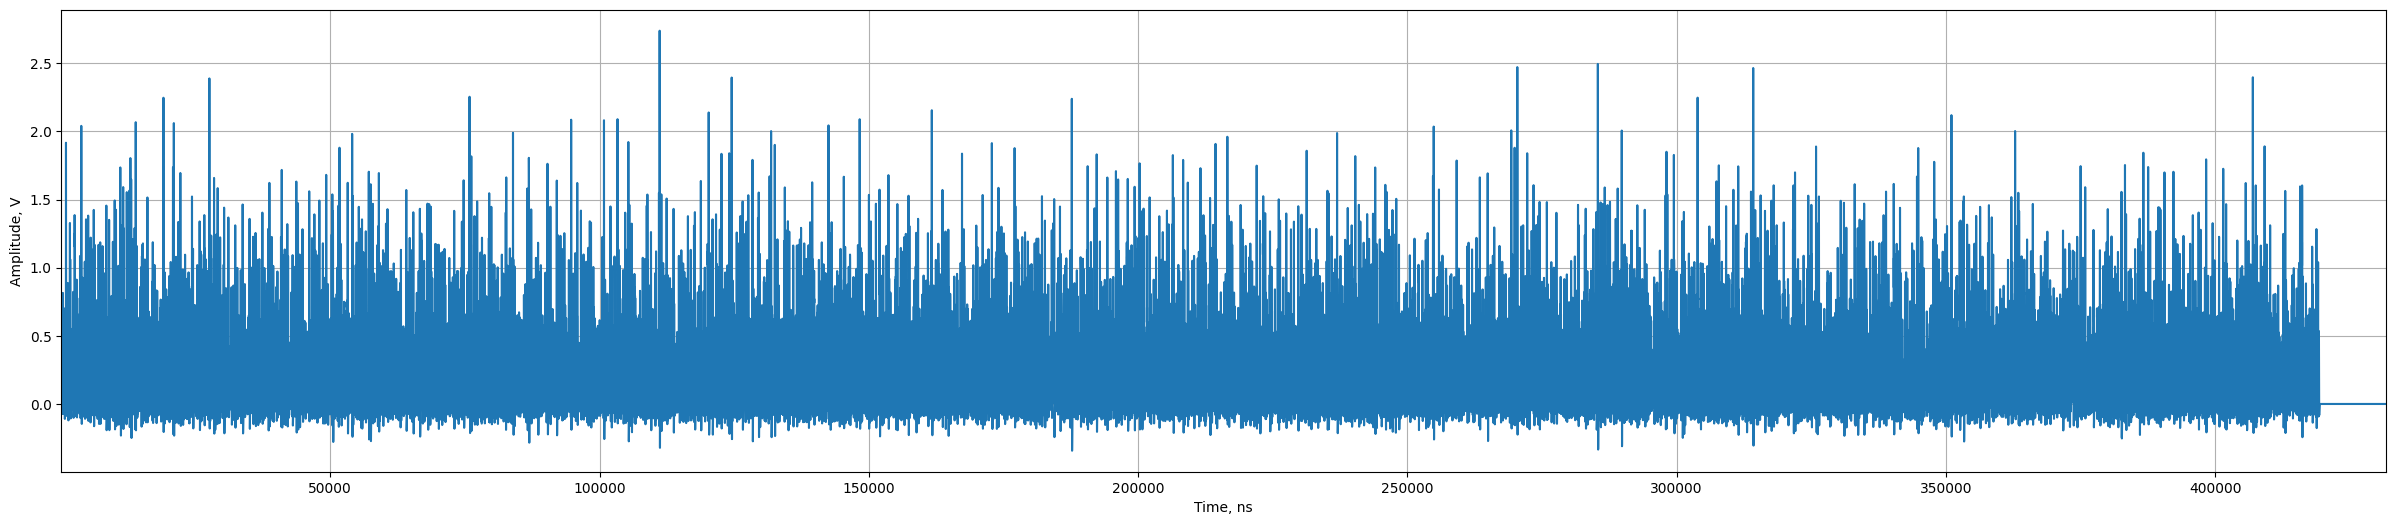

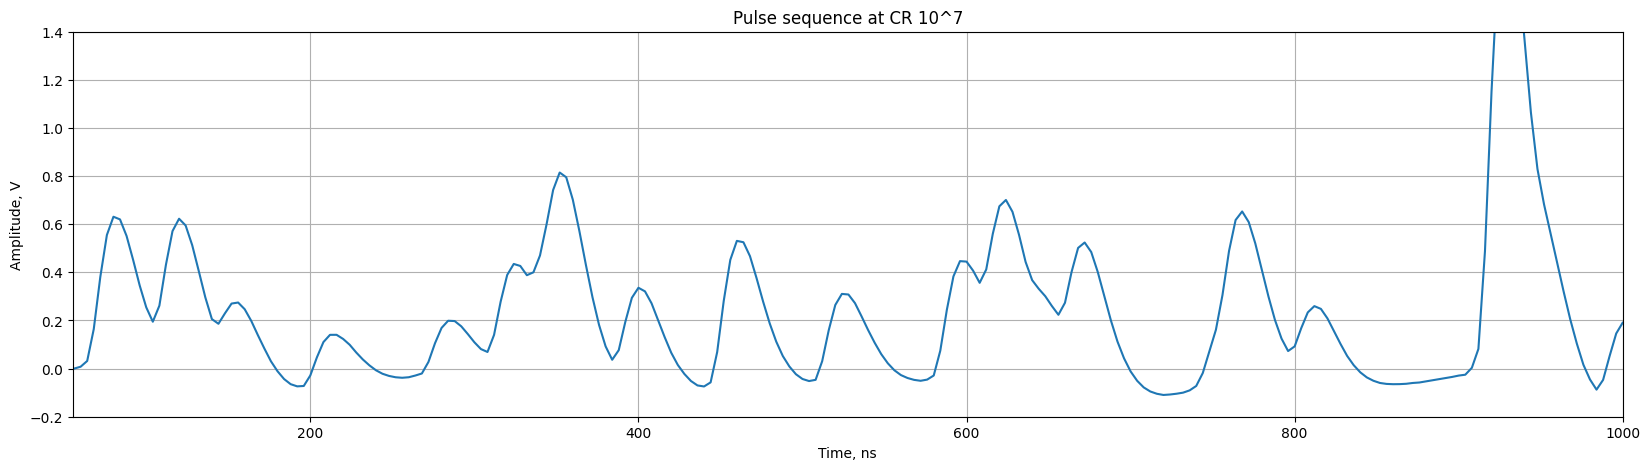

In [27]:
fig = plt.figure(figsize=(30, 6))
plt.ylabel('Amplitude, V')
plt.xlabel('Time, ns')
plt.plot(times_sum, initial)
plt.xlim((times[0]-1)*4, x_max)
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(20, 5))
plt.ylabel('Amplitude, V')
plt.xlabel('Time, ns')
plt.title(f'Pulse sequence at CR 10^{index}')

plt.plot(times_sum, initial)
plt.xlim((times[0]-1)*4,1000)
#plt.xticks(np.arange(0,500, step = 10))
plt.ylim(-0.2,1.4)
plt.grid(True)
plt.show()

In [ ]:
with open('Nalozh1.txt', 'w') as f:
    for elem in initial:
        f.write(str(elem) + '\n')
    f.close()
    files.download('Nalozh1.txt')